# **XGBoost**

La méthode [XGBoost](https://www.lovelyanalytics.com/2016/09/12/gradient-boosting-comment-ca-marche/) ,basée sur le Gradient Boosting, consiste à utiliser plusieurs petits algorithmes sauf qu'à la différence du bagging, les algorithmes ne sont pas indépendants.


#Sommaire :     

1.[Import des jeux de données](#Imports)

2.[XGBoost sur les émissions de CO2](#CV)

3.[XGBoost sur l'utilisation d'énergie](#hp)



<a name="Imports"></a>
## **Import des jeux de données** :

In [ ]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
X_train = pd.read_csv('/content/drive/MyDrive/X_trainlog.csv',sep='\t')
X_test = pd.read_csv('/content/drive/MyDrive/X_testlog.csv',sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Y_train = pd.read_csv('/content/drive/MyDrive/Y_trainlog.csv',sep='\t')
Y_test = pd.read_csv('/content/drive/MyDrive/Y_testlog.csv',sep='\t')

MetCO2=pd.read_csv('/content/drive/MyDrive/MetC02_RegForest.csv',sep='\t')
MetEn=pd.read_csv('/content/drive/MyDrive/MetEn_RegForest.csv',sep='\t')

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import timeit 
start_time=timeit.default_timer()
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, Y_train['TotalGHGEmissions'],early_stopping_rounds=5, 
             eval_set=[(X_test, Y_test['TotalGHGEmissions'])], verbose=False)

[03:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)



<a name="CV"></a>
## **Regression XGBoost sur les émissions de CO2 :**

In [ ]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Y_test['TotalGHGEmissions'])))

Mean Absolute Error : 0.09470609376206417


In [ ]:
lm=my_model

In [ ]:
Y_pred = lm.predict(X_test)
MSE_lin=mean_squared_error(Y_test['TotalGHGEmissions'],Y_pred)
print('Notre MSE est égal à %0.2f' %MSE_lin)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE= mean_absolute_percentage_error(Y_test['TotalGHGEmissions'], Y_pred) * 100
print('MAPE :' ,round(MAPE,2), '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(lineartime,2))   
rmse_linear = (np.sqrt(mean_squared_error(Y_test['TotalGHGEmissions'], Y_pred)))
r2_linear= r2_score(Y_test['TotalGHGEmissions'], Y_pred)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear))
#print('\n')
print('MSE Train Score :', round(lm.score(X_train,Y_train['TotalGHGEmissions']),2))
print('MSE Test Score :', round(lm.score(X_test,Y_test['TotalGHGEmissions']),2))

Notre MSE est égal à 0.02
MAPE : 6.3 %
Voici le temps de calcul en ms 1.39
RMSE est 0.14056874080609827
le score R2 coeff de determination est de 0.99
MSE Train Score : 1.0
MSE Test Score : 0.99


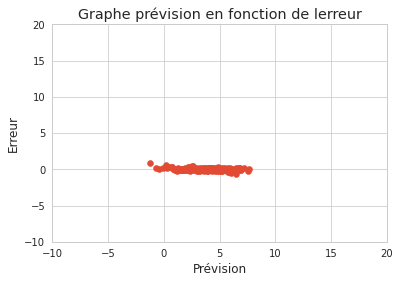

In [ ]:
erreur=Y_pred-Y_test['TotalGHGEmissions'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()


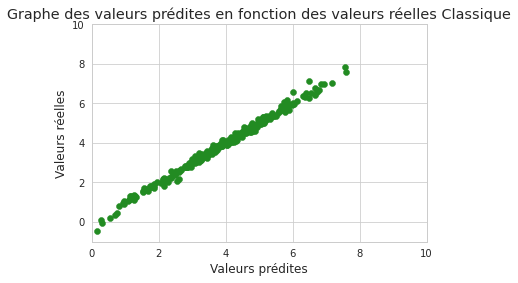

In [ ]:
plt.figure()
plt.scatter(Y_pred,Y_test['TotalGHGEmissions'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles Classique')
plt.xlim(0,10)
plt.ylim(-1,10)
plt.show()

<a name="hp"></a>
## **Regression XGBoost sur l'utilisation d'énergie**

In [ ]:
my_model = XGBRegressor(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, Y_train['SiteEnergyUse(kBtu)'],early_stopping_rounds=5, 
             eval_set=[(X_test, Y_test['SiteEnergyUse(kBtu)'])], verbose=False)

[03:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Y_test['SiteEnergyUse(kBtu)'])))

Mean Absolute Error : 0.2688337796551238


In [ ]:
Y_pred_bis = lm.predict(X_test)
MSE_lin_bis=mean_squared_error(Y_test['SiteEnergyUse(kBtu)'],Y_pred_bis)
print('Notre MSE est égal à %0.2f' %MSE_lin)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE_bis= mean_absolute_percentage_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis) * 100
print('MAPE :' ,round(MAPE_bis,2), '%')
# Evaluation du training set

lineartime_bis= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',lineartime_bis)   
rmse_linear_bis = (np.sqrt(mean_squared_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)))
r2_linear_bis= r2_score(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear_bis))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear_bis))
#print('\n')
print('MSE Train Score :', round(lm.score(X_train,Y_train['SiteEnergyUse(kBtu)']),2))
print('MSE Test Score :', round(lm.score(X_test,Y_test['SiteEnergyUse(kBtu)']),2))

Notre MSE est égal à 0.02
MAPE : 75.2 %
Voici le temps de calcul en ms 143.027291441
RMSE est 11.051210934359702
le score R2 coeff de determination est de -66.77
MSE Train Score : -70.55
MSE Test Score : -66.77


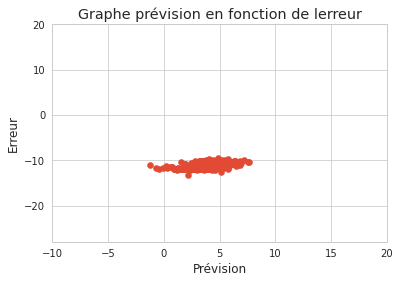

In [ ]:
erreur=Y_pred_bis-Y_test['SiteEnergyUse(kBtu)'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred_bis,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-28,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()

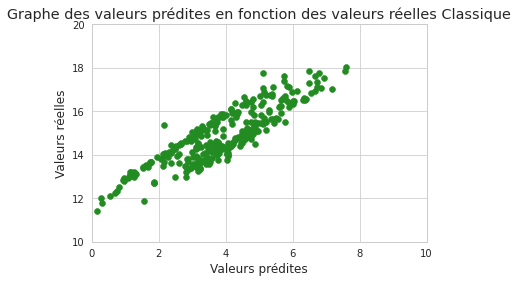

In [ ]:
plt.figure()
plt.scatter(Y_pred_bis,Y_test['SiteEnergyUse(kBtu)'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles Classique')
plt.xlim(0,10)
plt.ylim(10,20)
plt.show()

Au final on a de bons résultats mais ils sont moins bons que la méthode Random Forest.

In [ ]:
new_row = {'MSE': MSE_lin, 'R2': r2_linear, 'time': lineartime}
MetCO2 = MetCO2.append(new_row, ignore_index=True)

new_row1 = {'MSE': MSE_lin_bis, 'R2': r2_linear_bis, 'time': lineartime_bis}
MetEn = MetEn.append(new_row, ignore_index=True)

In [ ]:
MetCO2.to_csv("/content/drive/MyDrive/MetC02_RegBoost.csv",sep='\t')
MetEn.to_csv("/content/drive/MyDrive/MetEn_RegBoost.csv", sep='\t')